In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from rich.progress import track
import os
from itertools import combinations
from numpy import array

In [2]:
# with open('readings_timeid_sa1.pkl','wb') as f:
    # pickle.dump(new_result,f)

#load
with open('readings_timeid_sa1.pkl','rb') as f:
    new_result = pickle.load(f)

# with open('readings_timeid.pkl','rb') as f:
    # results = pickle.load(f)
# len(total_id_list)


new_result_ones = np.ones_like(new_result)
locs_0 = np.where(new_result == 0)
new_result_ones[locs_0] = 0

In [3]:
#
total_id_list = [  
         3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,
        84,  85,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 103, 104, 105, 106, 107, 109, 111, 121, 122]

In [4]:
pairs = [[14, array([ 3, 23, 42])],
 [15, array([ 5, 17])],
 [24, array([21, 26, 41])],
 [25, array([14, 30, 39, 56])],
 [26, array([  9,  15,  18,  24,  37,  44, 105, 121])],
 [27, array([12, 45, 46])],
 [28, array([ 8, 25, 36])],
 [33, array([64, 75, 99])],
 [36, array([13, 40])],
 [37, array([ 34,  43, 106])],
 [53, array([ 70, 122])],
 [54, array([49, 68])],
 [63, array([66, 72])],
 [64, array([54, 73])],
 [66, array([ 32,  35,  50,  94, 107])],
 [69, array([79, 95])],
 [75, array([92, 97])],
 [77, array([33, 53])],
 [78, array([10, 19])],
 [91, array([85, 89])]]

In [5]:
new_id_list = [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 84, 85, 87, 88, 92, 93, 94, 96, 97, 98, 100, 103, 104, 109, 111, 121, 122]

In [6]:
comb_new1 = [(3, 23), (3, 42), (23, 42), (5, 17), (21, 26), (21, 41), (26, 41), (14, 30), (14, 39), (14, 56), (30, 39), (30, 56), (39, 56), (9, 15), (9, 18), (9, 24), (9, 37), (9, 44), (9, 105), (9, 121), (15, 18), (15, 24), (15, 37), (15, 44), (15, 105), (15, 121), (18, 24), (18, 37), (18, 44), (18, 105), (18, 121), (24, 37), (24, 44), (24, 105), (24, 121), (37, 44), (37, 105), (37, 121), (44, 105), (44, 121), (105, 121), (12, 45), (12, 46), (45, 46), (8, 25), (8, 36), (25, 36), (64, 75), (64, 99), (75, 99), (13, 40), (34, 43), (34, 106), (43, 106), (70, 122), (49, 68), (66, 72), (54, 73), (32, 35), (32, 50), (32, 94), (32, 107), (35, 50), (35, 94), (35, 107), (50, 94), (50, 107), (94, 107), (79, 95), (92, 97), (33, 53), (10, 19), (85, 89)]

In [7]:
comb_list_new = [19,50,12,71,9]
for comb_id in comb_list_new:
    print(comb_id,comb_new1[comb_id])

19 (9, 121)
50 (13, 40)
12 (39, 56)
71 (10, 19)
9 (14, 56)


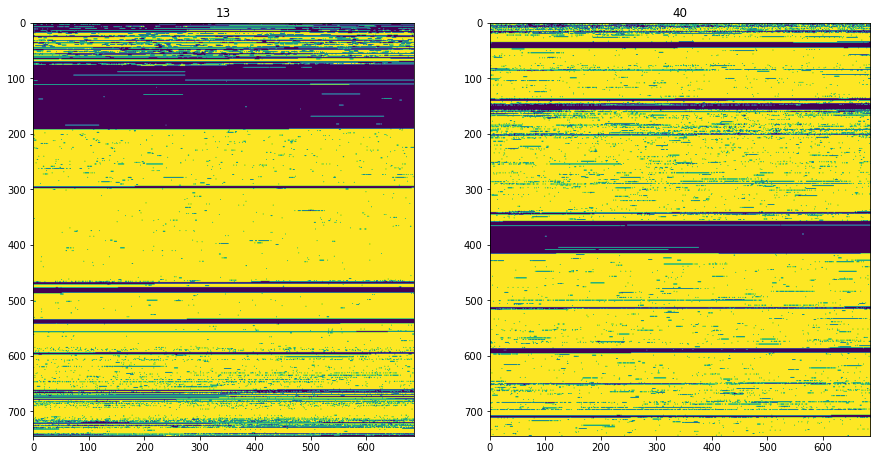

In [8]:
def check_comb_pic(c):
    v1 = new_result_ones.T[c[0]]
    v2 = new_result_ones.T[c[1]]

    plt.figure(figsize=(15,10))
    plt.subplot(121)
    plt.imshow(v1.reshape(745,686))
    plt.title(c[0])
    plt.subplot(122)
    plt.imshow(v2.reshape(745,686))
    plt.title(c[1])

check_comb_pic((13,40))

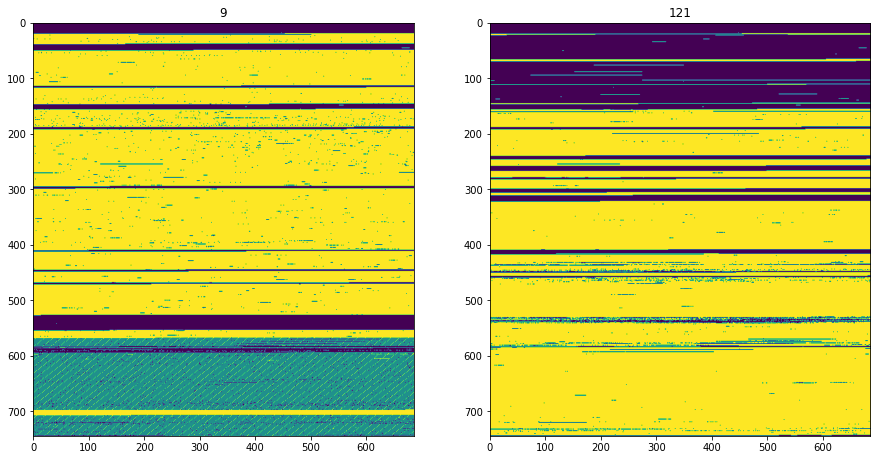

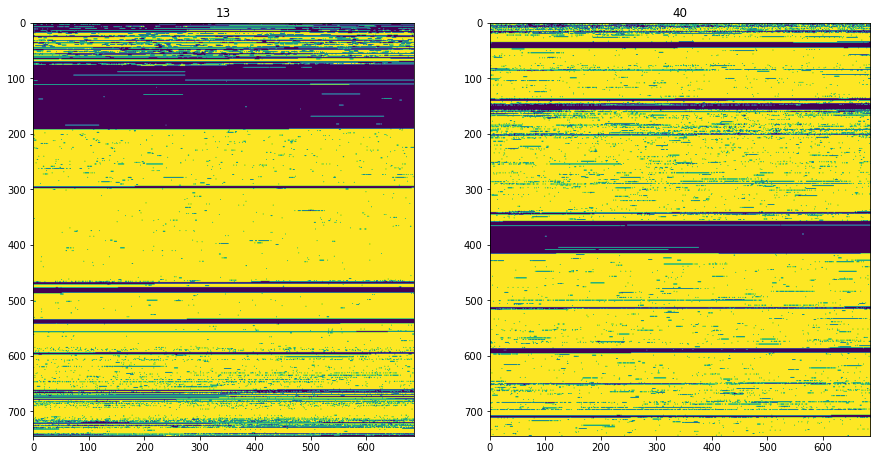

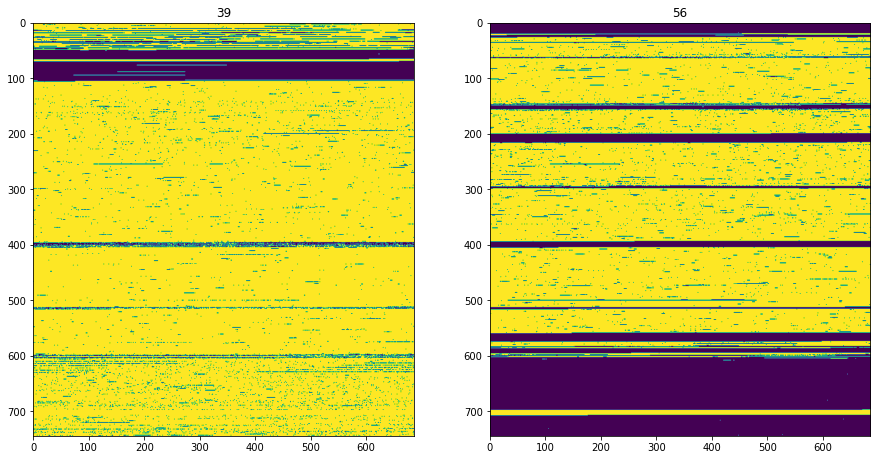

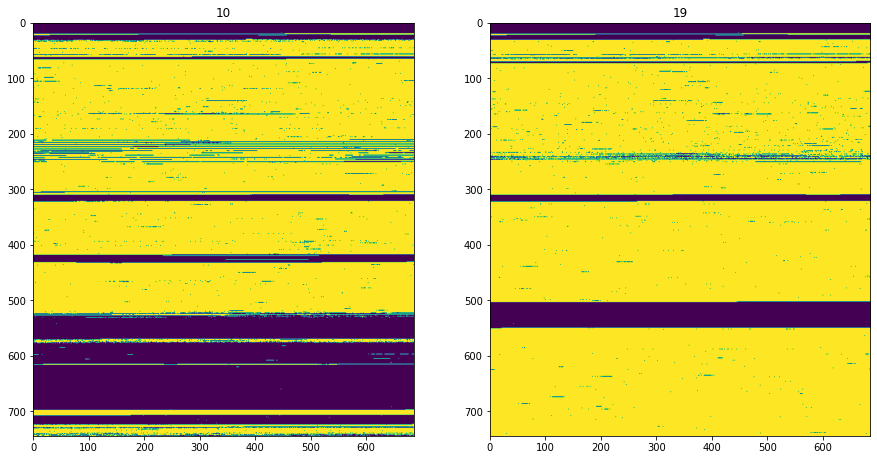

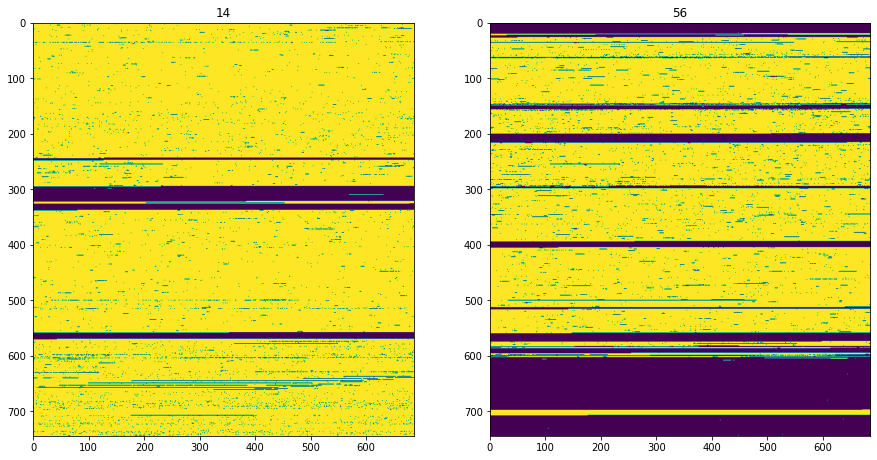

In [16]:
for id in comb_list_new:
    check_comb_pic(comb_new1[id])

(9, 121)
(13, 40)
(39, 56)
(10, 19)
(14, 56)


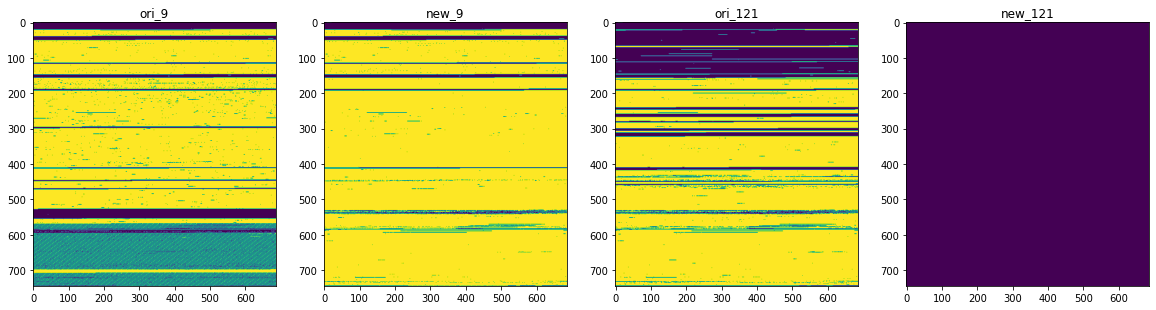

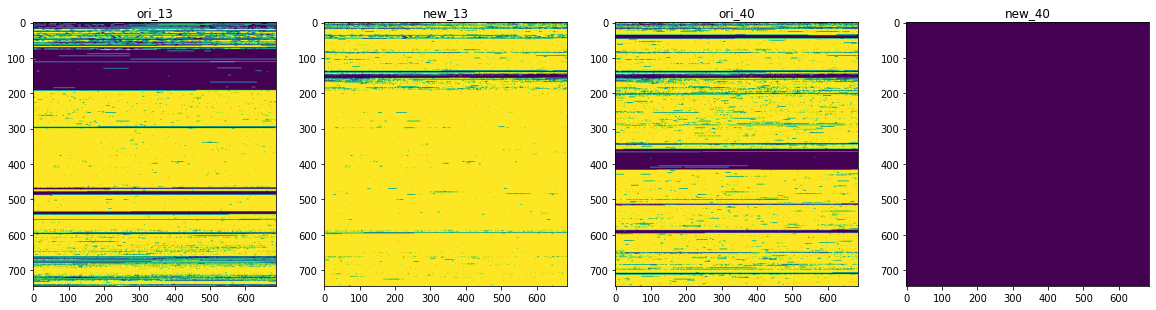

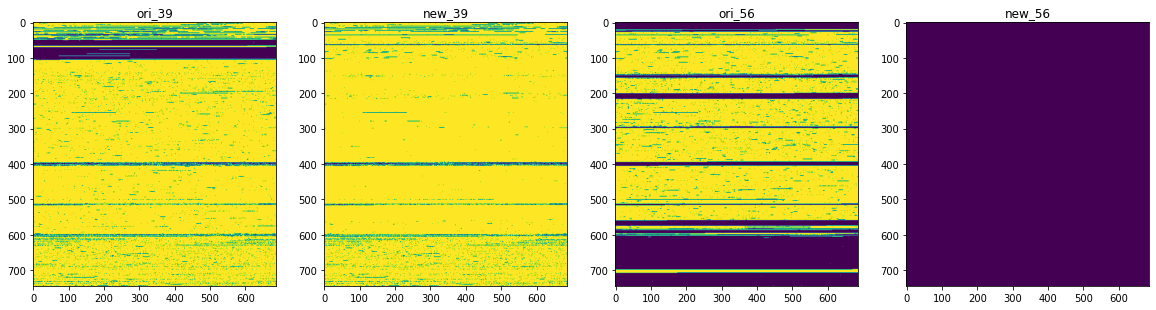

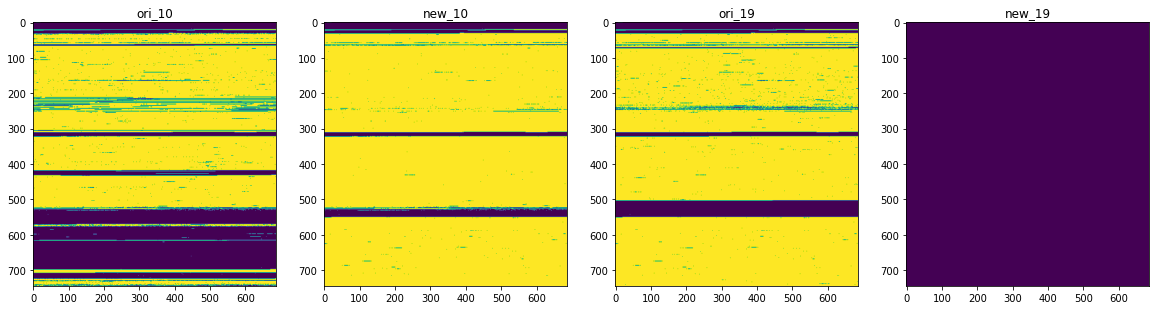

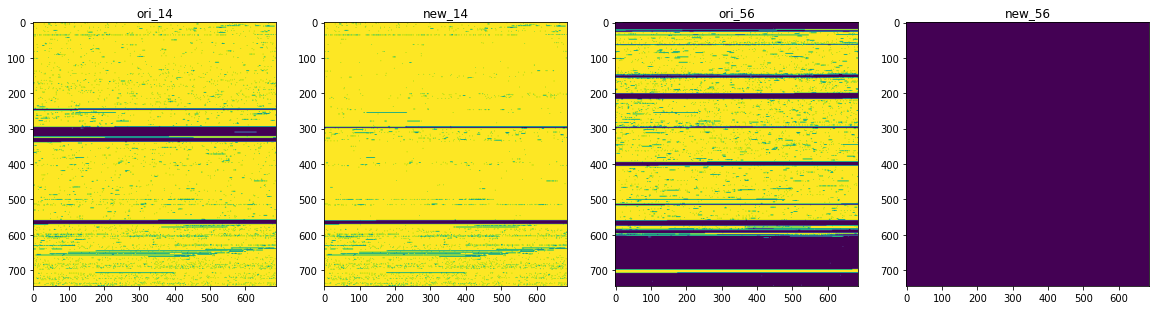

In [12]:
nnew_results = new_result.copy()
zeros = np.zeros_like(745*686)

for item in comb_list_new:
    intersection_comb = new_result_ones.T[comb_new1[item][0]] * new_result_ones.T[comb_new1[item][1]]

    locs = np.where(intersection_comb > 0)


    v1 = new_result.T[comb_new1[item][0]].copy()
    v2 = new_result.T[comb_new1[item][1]].copy()
    v2[locs] = 0

    v = v1+v2


    nnew_results.T[comb_new1[item][0]] = v
    nnew_results.T[comb_new1[item][1]] = zeros


    nnew_results_ones = np.ones_like(nnew_results)
    nnew_results_ones[np.where(nnew_results ==0 )] = 0
    

    print(comb_new1[item])

    plt.figure(figsize=(20,20))

    plt.subplot(141)
    plt.imshow(new_result_ones.T[comb_new1[item][0]].reshape(745,686))
    plt.title('ori_{}'.format(comb_new1[item][0]))

    
    plt.subplot(142)
    plt.imshow(nnew_results_ones.T[comb_new1[item][0]].reshape(745,686))
    plt.title('new_{}'.format(comb_new1[item][0]))


    plt.subplot(143)
    plt.imshow(new_result_ones.T[comb_new1[item][1]].reshape(745,686))
    plt.title('ori_{}'.format(comb_new1[item][1]))


    plt.subplot(144)
    plt.imshow(nnew_results_ones.T[comb_new1[item][1]].reshape(745,686))
    plt.title('new_{}'.format(comb_new1[item][1]))

In [20]:
nnew_id_list = []

drop_id_list = []
remain_id_list = []

for item in comb_list_new:
    remain_id_list.append(comb_new1[item][0])
    drop_id_list.append(comb_new1[item][1])


for id in new_id_list:
    if id in drop_id_list:
        pass
    else:
        nnew_id_list.append(id)

print('re: ',remain_id_list)
print('drop: ',drop_id_list)
    
print('nnew_id_list: ',nnew_id_list)
print('new_id_list: ',new_id_list)

re:  [9, 13, 39, 10, 14]
drop:  [121, 40, 56, 19, 56]
nnew_id_list:  [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 84, 85, 87, 88, 92, 93, 94, 96, 97, 98, 100, 103, 104, 109, 111, 122]
new_id_list:  [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 84, 85, 87, 88, 92, 93, 94, 96, 97, 98, 100, 103, 104, 109, 111, 121, 122]


In [21]:
with open('readings_timeid_sa2.pkl','wb') as f:
    pickle.dump(nnew_results,f)

In [22]:
nnew_results.shape

(511070, 123)